<a href="https://colab.research.google.com/github/pedro-zappa/pedro-zappa/blob/main/MVP_Ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Requisitos e composição da nota:**

> **(1,0 pt) Execução sem erros:** o notebook deve poder ser executado pelo professor do início ao fim sem erros.

> **(2,0 pts) Documentação consistente:** utilize blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim.

> **(1,0 pt) Código limpo:** seu código deve estar legível e organizado. Devem ser utilizadas as boas práticas de codificação em Python (sugestão: consulte a disciplina Programação Orientada a Objetos), mas não é necessário que você crie classes no seu código.

> **(2,0 pts) Análise de resultados do modelo:** no final de cada entregável do MVP (Machine Learning e Deep Learning) você deverá escrever um bloco de texto resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção. Sugerimos também incluir um bloco de texto de conclusão do problema como um todo, resumindo os principais pontos e fazendo um fechamento.

> **(2,0 pt) Checklist:** para cada entregável, você deverá responder às perguntas (aplicáveis ao seu dataset) do checklist fornecido, utilizando-o como guia para o desenvolvimento do trabalho.

> **(2,0 pts) Capricho e qualidade do trabalho como um todo.**

###**Checklist sugerido:**

###**Definição do Problema**

####Objetivo: entender e descrever claramente o problema que está sendo resolvido.

>Qual é a descrição do problema?

>Você tem premissas ou hipóteses sobre o problema? Quais?

>Que restrições ou condições foram impostas para selecionar os dados?

>Descreva o seu dataset (atributos, imagens, anotações, etc).

####Preparação de Dados####

Objetivo: realizar operações de preparação dos dados.

Separe o dataset entre treino e teste (e validação, se aplicável).
Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.
Modelagem e treinamento:

Objetivo: construir modelos para resolver o problema em questão.

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
Há algum ajuste inicial para os hiperparâmetros?
O modelo foi devidamente treinado? Foi observado problema de underfitting?
É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
Há algum método avançado ou mais complexo que possa ser avaliado?
Posso criar um comitê de modelos diferentes para o problema (ensembles)?
Avaliação de Resultados:

Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

Selecione as métricas de avaliação condizentes com o problema, justificando.
Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
Os resultados fazem sentido?
Foi observado algum problema de overfitting?
Compare os resultados de diferentes modelos.
Descreva a melhor solução encontrada, justificando.


#MVP - Treinamento de Modelo Clássico de *Machine Learning*

## Definição do Problema

O objetivo é prever se a pessoa ganha mais ou menos do que USD 50mil por ano, com base no dataset derivado da base de dados do censo americano de 1994, contendo os seguintes atributos:

> 1.  age: continuous

> 2.  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

> 3.  fnlwgt (final weight): continuous

> 4.  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

> 5.  education-num: continuous.

> 6.  marital-status: Married-civ-spouse, Divorced, Never-married, Separated,
widowed, Married-spouse-absent, Married-AF-spouse.

> 7.  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

> 8.  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

> 9.  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

> 10. sex: Female, Male.

> 11. capital-gain: continuous.

> 12. capital-loss: continuous.

> 13. hours-per-week: continuous.

> 14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

O atributo "final weight" foi criado para ajustar o dataset, de modo que pessoas com características demográficas semelhantes devem ter pesos semelhantes. No entanto, como a amostra do Censo Americano é na verdade uma coleção de 51 amostras estaduais, cada uma com sua própria probabilidade de seleção, a afirmação só se aplica dentro do estado, o que é uma limitação.

##Preparação de Dados

Objetivo: realizar operações de preparação dos dados.

Separe o dataset entre treino e teste (e validação, se aplicável).
Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM


#importando o dataset
url_dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
labels_atributos = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
dataset = pd.read_csv(url_dados, names=labels_atributos)
print(type(dataset))
dataset.head()


<class 'pandas.core.frame.DataFrame'>


age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [ ]:
#verificando valores nulos
missing_values = dataset.isnull()
missing_count = dataset.isnull().sum()
print(missing_values)
print(missing_count)

         age  workclass  fnlwgt  education  education-num  marital-status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    sex  capital-gain  capital-loss  

In [4]:
#tratando atributos categóricos

from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_data = dataset[categorical_columns]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Selecionar as colunas que não foram codificadas
non_categorical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']
non_categorical_data = dataset[non_categorical_columns]

# Concatenar os DataFrames
encoded_df = pd.concat([encoded_df, non_categorical_data], axis=1)

encoded_df.head()

missing_count = encoded_df.isnull().sum()
print(missing_count)

workclass_ ?               0
workclass_ Federal-gov     0
workclass_ Local-gov       0
workclass_ Never-worked    0
workclass_ Private         0
                          ..
education-num              0
capital-gain               0
capital-loss               0
hours-per-week             0
class                      0
Length: 109, dtype: int64


In [5]:
#preparando os dados

# Separação em bases de treino e teste (holdout)
array = encoded_df.values
X = array[:,0:108] # atributos
y = array[:,108] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Seleção do Modelo


KNN: 0.777143 (0.009031)
CART: 0.816186 (0.005411)
NB: 0.797874 (0.006793)
SVM: 0.795378 (0.008880)


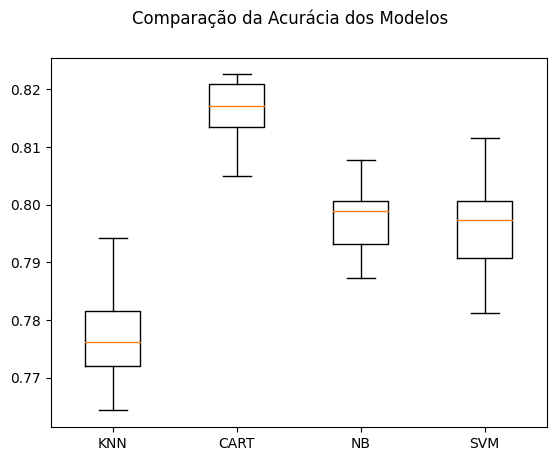

In [35]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(22)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8122217104253032


Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
Há algum ajuste inicial para os hiperparâmetros?
O modelo foi devidamente treinado? Foi observado problema de underfitting?
É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
Há algum método avançado ou mais complexo que possa ser avaliado?
Posso criar um comitê de modelos diferentes para o problema (ensembles)?

In [6]:

#adicionando a base para a padronização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#adicionando modelos que não haviam sido importados ainda
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#adicionando a base para a construção do pipeline
from sklearn.pipeline import Pipeline

#adicionando a base para a construção dos ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [7]:
#preparando os dados novamente (contemplando o holdout com estratificação e a validação cruzada)

test_size = 0.20 # tamanho do conjunto de teste
seed = 22 # semente aleatória

# Separação em conjuntos de treino e teste
array = encoded_df.values
X = array[:,0:108] # atributos
y = array[:,108]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

LR: 0.798718 (0.004619)
Bagging: 0.856419 (0.004514)
RF: 0.849086 (0.004652)
ET: 0.827971 (0.005187)
Ada: 0.865095 (0.005980)
GB: 0.866631 (0.005163)
Voting: 0.817836 (0.006220)


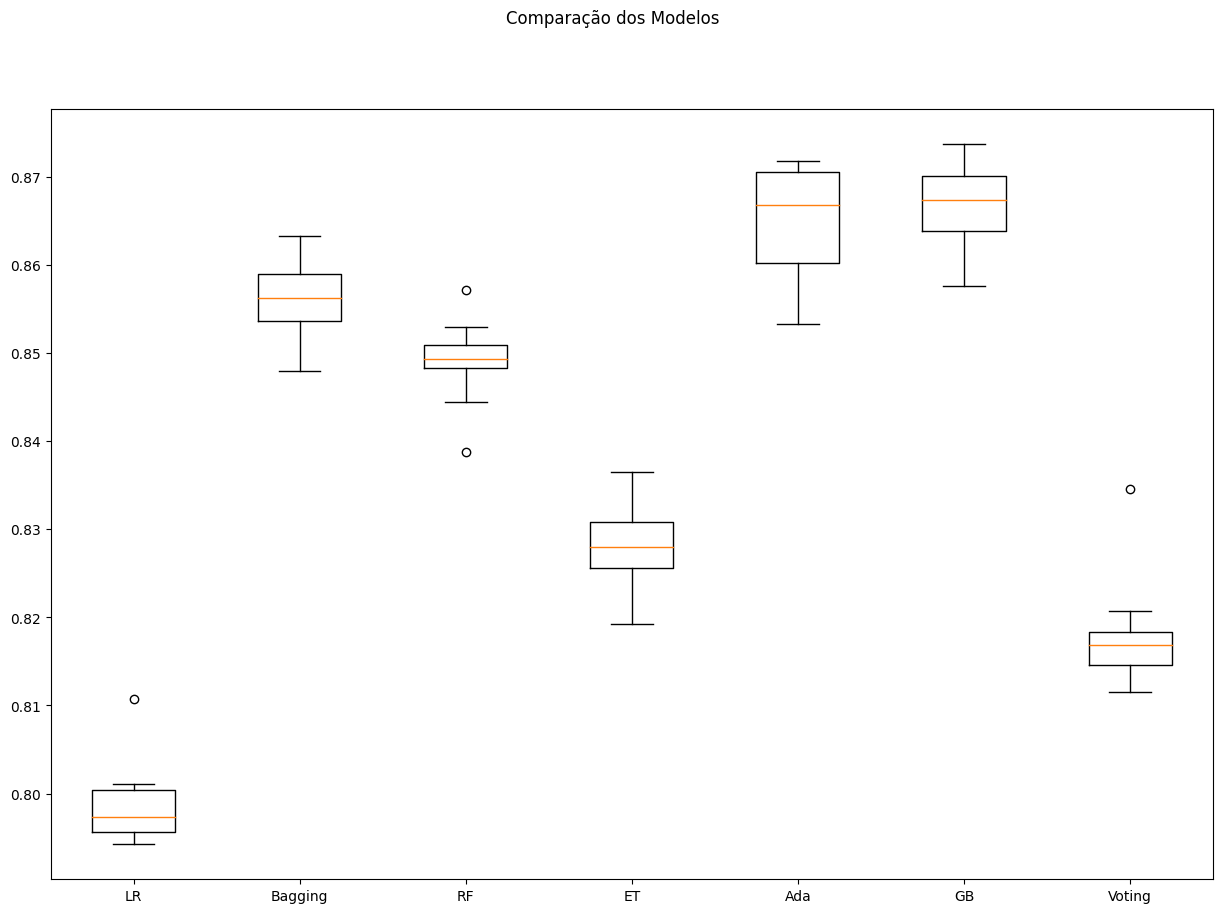

In [41]:
np.random.seed(22) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Adicionando o modelo de regressão logística
models.append(('LR', LogisticRegression(max_iter=200)))


# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:
# Tuning do GB

np.random.seed(22)  # defining a global seed for this block

pipelines = []

steps = [('GB', GradientBoostingClassifier())]
pipeline = Pipeline(steps)
pipelines.append(('GB', pipeline))  # Add the pipeline to the list

param_grid = {
    'GB__n_estimators': [50, 100, 200],  # Number of boosting stages
    'GB__learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'GB__max_depth': [3, 4, 5]  # Maximum depth of each tree
}

# Prepare and execute the GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Print the best configuration
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))



Sem tratamento de missings: GB - Melhor: 0.875269 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 200}


In [8]:
np.random.seed(22) # definindo uma semente global

# Criando um modelo com todo o conjunto de treino
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8662674650698603


# MVP - Modelo Baseado em Deep Learning

## 1. Definição do Problema


O objetivo é treinar o modelo para identificar três expressões faciais: alegria, tristeza e surpresa.

Trata-se de um problema de classificação com uso de visão computacional, sendo necessário o uso de deep learning.

## 2. Preparação de Dados

Os dados foram obtidos do Kaggle, url: https://www.kaggle.com/datasets/denisleu/facial-expressions-happiness-sadness-surprise


In [102]:
# importando as bibliotecas necessárias para usar no notebook

# para usar o Google Drive

!pip install gdown
import gdown
from google.colab import drive

# biblioteca do kaggle

!pip install kaggle

# bibliotecas do keras para pré-processamento de imagens, camadas para modelos convolucionais, modelos e otimizadores de parâmetros

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow import keras
from tensorflow.keras.preprocessing import image

# para poder acessar e manipular arquivos e diretórios / sistema operacional
import os
import shutil
import zipfile

# para realizar divisão entre treino e teste
from sklearn.model_selection import train_test_split

# geração de números aleatórios
import random

# operações matemáticas
import math

# cálculos numéricos (e arrays)
import numpy as np

# manipular estruturas de dados
import pandas as pd

# criar gráficos e visualizações
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# trabalhar com datas e horários
from datetime import datetime

# criar matriz de confusão e outras métricas de avaliação
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, classification_report

# iteradores
import itertools

# para mostrar as imagens
from IPython.display import Image

### Importando o Dataset do Google Drive

In [6]:
#https://drive.google.com/file/d/1-ALM8OY69wovGLD4kqxOcqzroe11kRR2/view?usp=sharing

file_id = "1-ALM8OY69wovGLD4kqxOcqzroe11kRR2"
url = f"https://drive.google.com/uc?id={file_id}"

folder_path = "."  # especifique a pasta onde baixara o arquivo
os.makedirs(folder_path, exist_ok=True) # cria a pasta de destino se necessário

output = "/facialexpressions.zip"  # especifique o nome do arquivo e a extensão do mesmo
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1-ALM8OY69wovGLD4kqxOcqzroe11kRR2
To: /facialexpressions.zip
100%|██████████| 66.6M/66.6M [00:00<00:00, 96.6MB/s]


'/facialexpressions.zip'

In [7]:
#descompactando o arquivo

destination = '.' # path onde se encontram as pastas e arquivos rotulados, tanto para teste quanto para treino

os.makedirs(destination,exist_ok=True) # cria a pasta de destino se necessário

with zipfile.ZipFile(output,'r') as zip_ref:
    zip_ref.extractall(destination)

### Definição dos caminhos para as imagens de treinamento e teste


In [28]:
# paths = ['dataset/images/Face Expressions (Happy, Sad, Surprise)/train/happy/', 'dataset/images/Face Expressions (Happy, Sad, Surprise)/train/sad/', 'dataset/images/Face Expressions (Happy, Sad, Surprise)/train/surprise/']

# for path in paths:
#     images = os.listdir(path)

# labels, heights, widths, channels, filesize = [], [], [], [], []

# # Loop que percorre cada uma das imagens extraídas
# for fname in images:

#     labels.append(str(fname)[:3])
#     img_shape = mpimg.imread(path+fname).shape
#     heights.append(img_shape[0])
#     widths.append(img_shape[1])
#     channels.append(img_shape[2])
#     filesize.append(os.path.getsize(path+fname))

# # Criação do dataset
# df = pd.DataFrame({'images': images, 'class': labels, 'height': heights,
#                          'width': widths, 'channels': channels, 'filesize': filesize})

# #PROBLEMA ESTA SENDO JUNTAR TUDO NO MESMO DATAFRAME

In [8]:
train_dir = 'Face Expressions (Happy, Sad, Surprise)/train'
test_dir = 'Face Expressions (Happy, Sad, Surprise)/test'

###Definição do Tamanho do Batch e Dimensões das Imagens

In [9]:
batch_size = 32
img_height = 224
img_width = 224
num_classes = 3 # o número de classes corresponde às seguintes classes: "Happy", "Sad" e "Surprise"

### Preparação dos dados

ImageDataGenerator é uma classe utilitária fornecida pelo TensorFlow para aumentar e pré-processar dados de imagens. É comumente usada em tarefas de deep learning, especialmente para classificação de imagens, para gerar imagens aumentadas (data augmentation) sob demanda durante o treinamento do modelo.

Veja que neste caso é usado o método flow_from_directory() para gerar imagens aumentadas a partir de um diretório contendo as imagens originais. O método recebe parâmetros como o diretório com as imagens, o tamanho final da imagem, o tamanho do lote (batch size) e o modo de classe (neste caso, categóricas porque são várias classes), entre outros.

Importante ressaltar que o pré-processamento de validação e teste não evolve o aumento de dados.

In [15]:
train_datagen = ImageDataGenerator(validation_split=0.2, #include validation split
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Criação dos data generators

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   subset='training')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        subset='validation')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_height, img_width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 2740 images belonging to 3 classes.
Found 683 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


### Exibindo um exemplo de geração de imagens

In [97]:
# Set the path to the directory containing the sample images
samples_dir = test_dir

# Get a list of all files in the directory
sample_files = os.listdir(samples_dir)

# Get a random sample file
random_sample_file = random.sample(sample_files, 1)[0]

# Construct the full path to the random sample file
random_sample_path = os.path.join(samples_dir, random_sample_file)

# Load and display the image
img = image.load_img(random_sample_path)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.img(target_size=(img_height, img_width),
                                     batch_size=batch_size,
                                     class_mode='categorical',
                                     subset='training')

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

AttributeError: ignored

## 3. Preparação do Modelo

Definição do arquitetura do modelo.
Aqui é especificada uma camada convolucional 2D que possui 32 filtros e usa a função de ativação ReLU. O parâmetro input_shape define a forma das imagens de entrada para a rede. Na sequência é adicionada uma camada softmax com a mesma função de ativação.

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

## 4. Treinamento do Modelo

Compilação do modelo Keras com as configurações do treinamento.
optimizer='adam': especifica o otimizador a ser usado durante o treinamento.

loss='categorical_crossentropy': especifica a função de perda a ser usada durante o treinamento. Para problemas de classificação multiclasse, onde a variável alvo tem mais de duas categorias, a perda categórica de entropia cruzada é freqüentemente empregada.

metrics=['accuracy']: especifica as métricas de avaliação a serem usadas durante o treinamento e o teste.

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20 define o número de épocas de treinamento para o modelo. Uma época representa uma passagem completa por todo o conjunto de dados de treinamento.

Já o método fit() inicia o processo de treinamento do modelo usando o número especificado de épocas.

In [16]:
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
86/86 [==============================] - 407s 5s/step - loss: 1.1674 - accuracy: 0.4847 - val_loss: 0.9344 - val_accuracy: 0.5373
Epoch 2/20
86/86 [==============================] - 406s 5s/step - loss: 0.7214 - accuracy: 0.6920 - val_loss: 0.7112 - val_accuracy: 0.7028
Epoch 3/20
86/86 [==============================] - 397s 5s/step - loss: 0.5551 - accuracy: 0.7672 - val_loss: 0.6543 - val_accuracy: 0.7247
Epoch 4/20
86/86 [==============================] - 402s 5s/step - loss: 0.4896 - accuracy: 0.8058 - val_loss: 0.5504 - val_accuracy: 0.7775
Epoch 5/20
86/86 [==============================] - 406s 5s/step - loss: 0.4434 - accuracy: 0.8190 - val_loss: 0.4926 - val_accuracy: 0.8023
Epoch 6/20
86/86 [==============================] - 406s 5s/step - loss: 0.3994 - accuracy: 0.8427 - val_loss: 0.5219 - val_accuracy: 0.7892
Epoch 7/20
86/86 [==============================] - 403s 5s/step - loss: 0.3725 - accuracy: 0.8562 - val_loss: 0.5812 - val_accuracy: 0.7672
Epoch 8/20
86

## 5. Execução do modelo de deep learning treinado em cada uma das imagens de teste

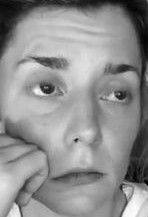

1/1 [==============================] - 0s 121ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8691778




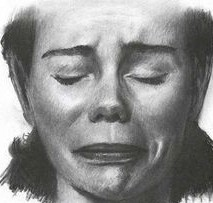

1/1 [==============================] - 0s 148ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9079213




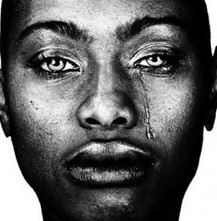

1/1 [==============================] - 0s 143ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9503773




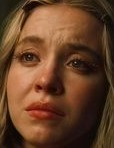

1/1 [==============================] - 0s 156ms/step
Label: sad
Previsão: happy
Probabilidade: 0.5733293




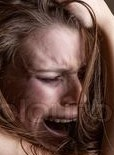

1/1 [==============================] - 0s 99ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9938817




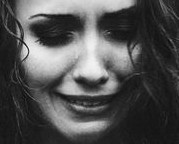

1/1 [==============================] - 0s 87ms/step
Label: sad
Previsão: happy
Probabilidade: 0.99984264




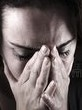

1/1 [==============================] - 0s 93ms/step
Label: sad
Previsão: sad
Probabilidade: 0.97814083




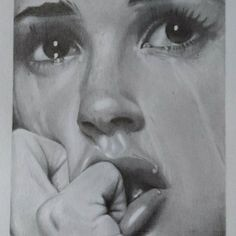

1/1 [==============================] - 0s 99ms/step
Label: sad
Previsão: happy
Probabilidade: 0.5411794




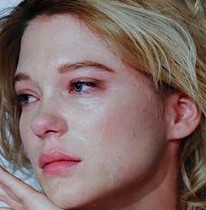

1/1 [==============================] - 0s 81ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9124926




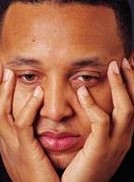

1/1 [==============================] - 0s 98ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9081029




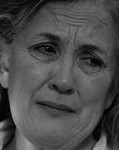

1/1 [==============================] - 0s 81ms/step
Label: sad
Previsão: sad
Probabilidade: 0.67469156




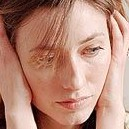

1/1 [==============================] - 0s 90ms/step
Label: sad
Previsão: sad
Probabilidade: 0.7584017




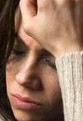

1/1 [==============================] - 0s 106ms/step
Label: sad
Previsão: sad
Probabilidade: 0.60849404




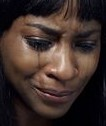

1/1 [==============================] - 0s 99ms/step
Label: sad
Previsão: happy
Probabilidade: 0.824922




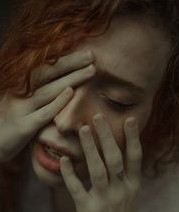

1/1 [==============================] - 0s 97ms/step
Label: sad
Previsão: happy
Probabilidade: 0.48902848




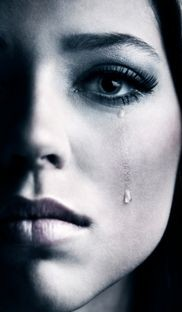

1/1 [==============================] - 0s 101ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9995253




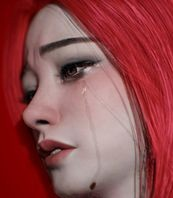

1/1 [==============================] - 0s 87ms/step
Label: sad
Previsão: happy
Probabilidade: 0.99336857




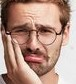

1/1 [==============================] - 0s 123ms/step
Label: sad
Previsão: sad
Probabilidade: 0.958695




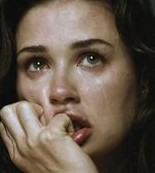

1/1 [==============================] - 0s 113ms/step
Label: sad
Previsão: sad
Probabilidade: 0.77785915




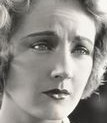

1/1 [==============================] - 0s 92ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8175942




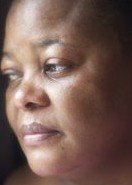

1/1 [==============================] - 0s 101ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9839395




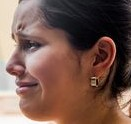

1/1 [==============================] - 0s 82ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9766382




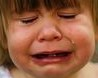

1/1 [==============================] - 0s 87ms/step
Label: sad
Previsão: happy
Probabilidade: 0.99209315




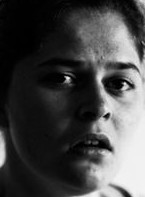

1/1 [==============================] - 0s 86ms/step
Label: sad
Previsão: sad
Probabilidade: 0.48259526




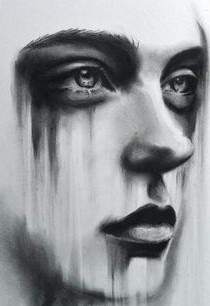

1/1 [==============================] - 0s 57ms/step
Label: sad
Previsão: happy
Probabilidade: 0.97969294




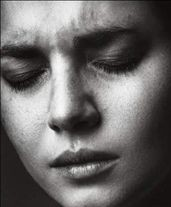

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8976485




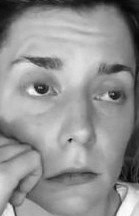

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8419267




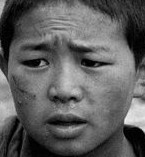

1/1 [==============================] - 0s 58ms/step
Label: sad
Previsão: sad
Probabilidade: 0.99416566




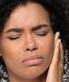

1/1 [==============================] - 0s 50ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9886312




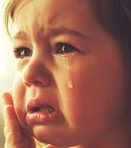

1/1 [==============================] - 0s 55ms/step
Label: sad
Previsão: happy
Probabilidade: 0.79760903




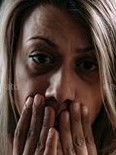

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: surprise
Probabilidade: 0.9145551




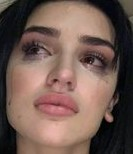

1/1 [==============================] - 0s 63ms/step
Label: sad
Previsão: happy
Probabilidade: 0.77087915




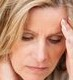

1/1 [==============================] - 0s 55ms/step
Label: sad
Previsão: happy
Probabilidade: 0.99099296




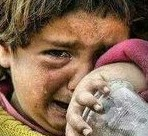

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: sad
Probabilidade: 0.88962996




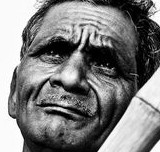

1/1 [==============================] - 0s 58ms/step
Label: sad
Previsão: sad
Probabilidade: 0.944861




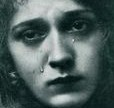

1/1 [==============================] - 0s 59ms/step
Label: sad
Previsão: sad
Probabilidade: 0.971184




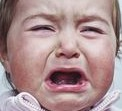

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: happy
Probabilidade: 0.93471384




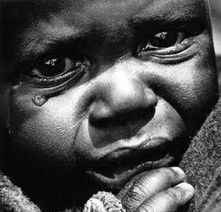

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: sad
Probabilidade: 0.5923378




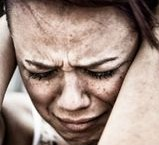

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: happy
Probabilidade: 0.8608796




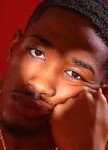

1/1 [==============================] - 0s 56ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9863593




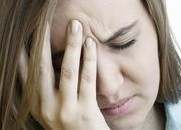

1/1 [==============================] - 0s 52ms/step
Label: sad
Previsão: sad
Probabilidade: 0.78315175




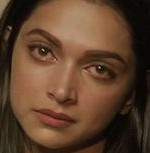

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: happy
Probabilidade: 0.59570974




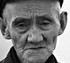

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9904248




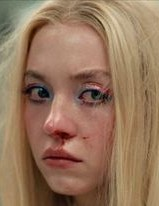

1/1 [==============================] - 0s 59ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9928063




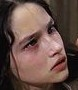

1/1 [==============================] - 0s 52ms/step
Label: sad
Previsão: happy
Probabilidade: 0.99575704




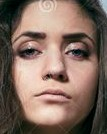

1/1 [==============================] - 0s 54ms/step
Label: sad
Previsão: sad
Probabilidade: 0.54311734




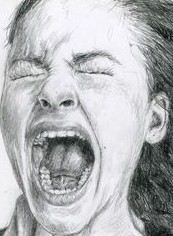

1/1 [==============================] - 0s 54ms/step
Label: sad
Previsão: happy
Probabilidade: 0.72482806




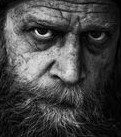

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9930561




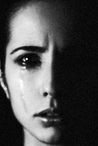

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9988681




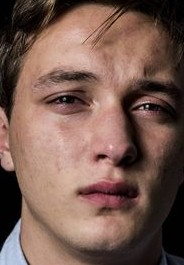

1/1 [==============================] - 0s 58ms/step
Label: sad
Previsão: sad
Probabilidade: 0.68629014




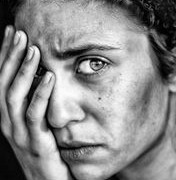

1/1 [==============================] - 0s 55ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9169557




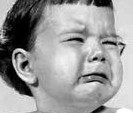

1/1 [==============================] - 0s 52ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9999126




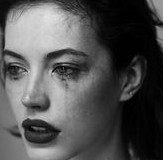

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: happy
Probabilidade: 0.64367




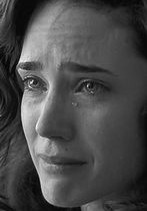

1/1 [==============================] - 0s 51ms/step
Label: sad
Previsão: sad
Probabilidade: 0.989007




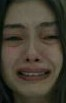

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: sad
Probabilidade: 0.5823517




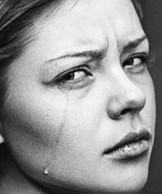

1/1 [==============================] - 0s 56ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9433772




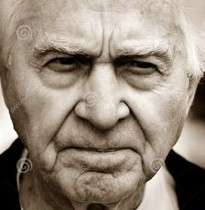

1/1 [==============================] - 0s 54ms/step
Label: sad
Previsão: happy
Probabilidade: 0.77931577




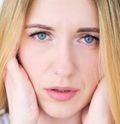

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: happy
Probabilidade: 0.82154536




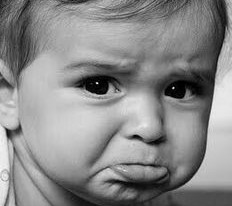

1/1 [==============================] - 0s 62ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9767215




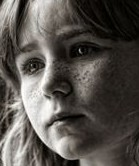

1/1 [==============================] - 0s 59ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9613074




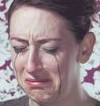

1/1 [==============================] - 0s 65ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9635668




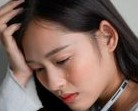

1/1 [==============================] - 0s 58ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9850873




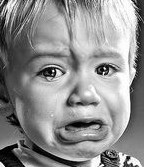

1/1 [==============================] - 0s 57ms/step
Label: sad
Previsão: sad
Probabilidade: 0.65145713




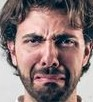

1/1 [==============================] - 0s 62ms/step
Label: sad
Previsão: sad
Probabilidade: 0.99859756




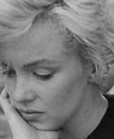

1/1 [==============================] - 0s 60ms/step
Label: sad
Previsão: happy
Probabilidade: 0.619865




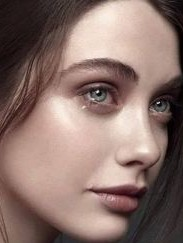

1/1 [==============================] - 0s 61ms/step
Label: sad
Previsão: sad
Probabilidade: 0.57307756




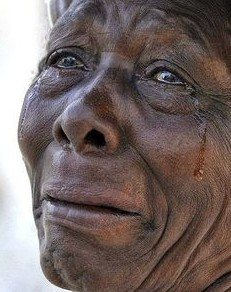

1/1 [==============================] - 0s 61ms/step
Label: sad
Previsão: happy
Probabilidade: 0.89008254




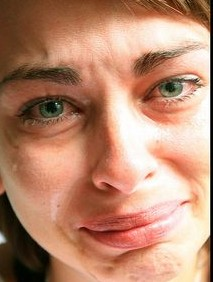

1/1 [==============================] - 0s 57ms/step
Label: sad
Previsão: sad
Probabilidade: 0.98367417




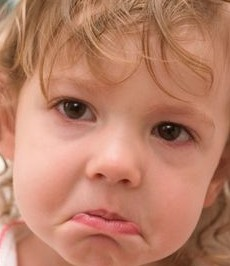

1/1 [==============================] - 0s 54ms/step
Label: sad
Previsão: sad
Probabilidade: 0.92626745




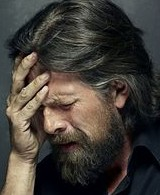

1/1 [==============================] - 0s 55ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9994935




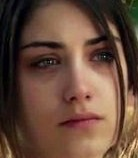

1/1 [==============================] - 0s 52ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9321582




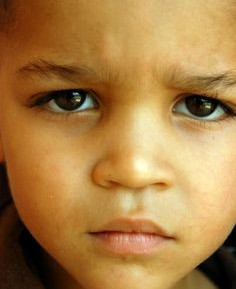

1/1 [==============================] - 0s 52ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9623439




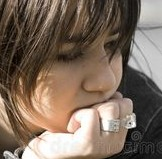

1/1 [==============================] - 0s 54ms/step
Label: sad
Previsão: happy
Probabilidade: 0.9995426




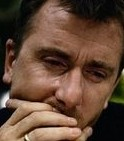

1/1 [==============================] - 0s 71ms/step
Label: sad
Previsão: sad
Probabilidade: 0.7735734




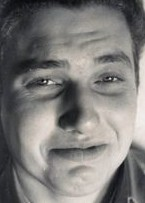

1/1 [==============================] - 0s 59ms/step
Label: sad
Previsão: happy
Probabilidade: 0.50234914




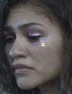

1/1 [==============================] - 0s 59ms/step
Label: sad
Previsão: happy
Probabilidade: 0.47328502




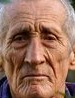

1/1 [==============================] - 0s 64ms/step
Label: sad
Previsão: sad
Probabilidade: 0.97311246




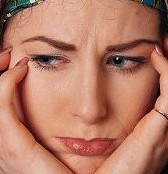

1/1 [==============================] - 0s 77ms/step
Label: sad
Previsão: sad
Probabilidade: 0.69303864




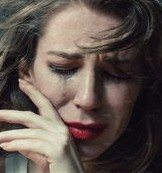

1/1 [==============================] - 0s 59ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8011627




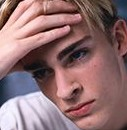

1/1 [==============================] - 0s 62ms/step
Label: sad
Previsão: happy
Probabilidade: 0.8862069




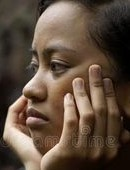

1/1 [==============================] - 0s 53ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8512598




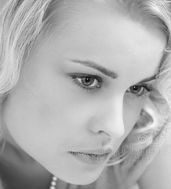

1/1 [==============================] - 0s 60ms/step
Label: sad
Previsão: happy
Probabilidade: 0.67872816




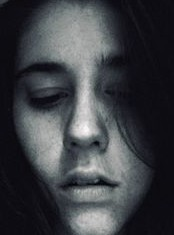

1/1 [==============================] - 0s 52ms/step
Label: sad
Previsão: sad
Probabilidade: 0.99470717




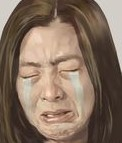

1/1 [==============================] - 0s 56ms/step
Label: sad
Previsão: happy
Probabilidade: 0.99855024




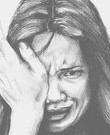

1/1 [==============================] - 0s 57ms/step
Label: sad
Previsão: surprise
Probabilidade: 0.81352395




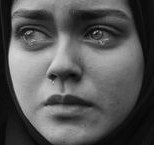

1/1 [==============================] - 0s 69ms/step
Label: sad
Previsão: happy
Probabilidade: 0.95648885




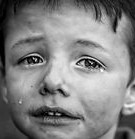

1/1 [==============================] - 0s 63ms/step
Label: sad
Previsão: sad
Probabilidade: 0.79944456




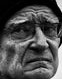

1/1 [==============================] - 0s 58ms/step
Label: sad
Previsão: sad
Probabilidade: 0.9275716




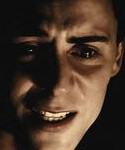

1/1 [==============================] - 0s 62ms/step
Label: sad
Previsão: sad
Probabilidade: 0.97572917




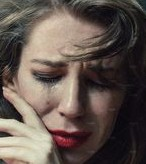

1/1 [==============================] - 0s 56ms/step
Label: sad
Previsão: sad
Probabilidade: 0.84625494




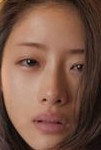

1/1 [==============================] - 0s 67ms/step
Label: sad
Previsão: sad
Probabilidade: 0.90405893




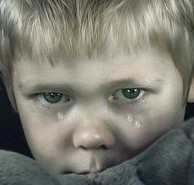

1/1 [==============================] - 0s 68ms/step
Label: sad
Previsão: sad
Probabilidade: 0.6277113




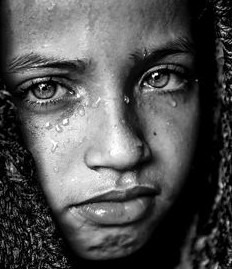

1/1 [==============================] - 0s 65ms/step
Label: sad
Previsão: sad
Probabilidade: 0.8262622




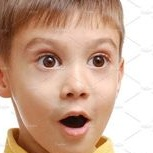

1/1 [==============================] - 0s 51ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99916124




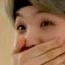

1/1 [==============================] - 0s 52ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.73162395




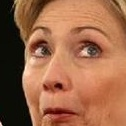

1/1 [==============================] - 0s 79ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.599676




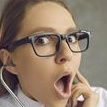

1/1 [==============================] - 0s 101ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.79201347




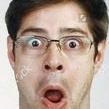

1/1 [==============================] - 0s 80ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99983335




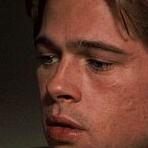

1/1 [==============================] - 0s 83ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.9653706




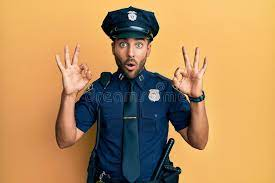

1/1 [==============================] - 0s 94ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.8911092




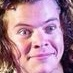

1/1 [==============================] - 0s 101ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.9649748




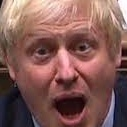

1/1 [==============================] - 0s 94ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.8807704




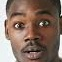

1/1 [==============================] - 0s 112ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9953425




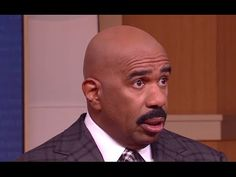

1/1 [==============================] - 0s 103ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.99534166




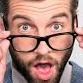

1/1 [==============================] - 0s 137ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.74792415




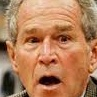

1/1 [==============================] - 0s 106ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9915024




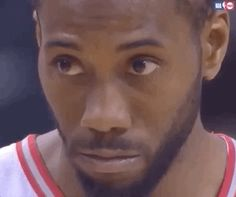

1/1 [==============================] - 0s 146ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.59339017




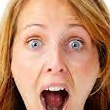

1/1 [==============================] - 0s 111ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99999845




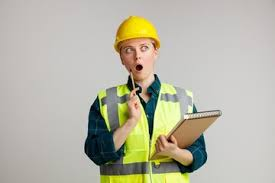

1/1 [==============================] - 0s 104ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.83525544




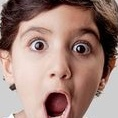

1/1 [==============================] - 0s 96ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9999932




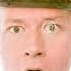

1/1 [==============================] - 0s 103ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.97167015




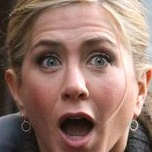

1/1 [==============================] - 0s 144ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9987748




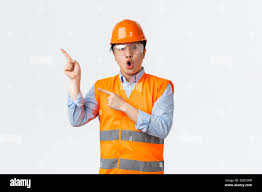

1/1 [==============================] - 0s 158ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.99643266




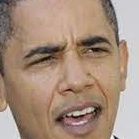

1/1 [==============================] - 0s 97ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.65414643




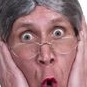

1/1 [==============================] - 0s 142ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99948174




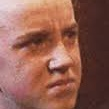

1/1 [==============================] - 0s 122ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.78581214




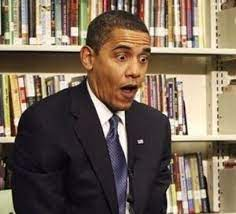

1/1 [==============================] - 0s 101ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99593025




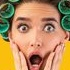

1/1 [==============================] - 0s 90ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99999857




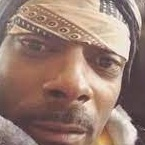

1/1 [==============================] - 0s 85ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.9787007




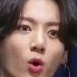

1/1 [==============================] - 0s 94ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.87154794




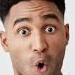

1/1 [==============================] - 0s 97ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9999013




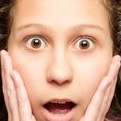

1/1 [==============================] - 0s 96ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9992894




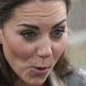

1/1 [==============================] - 0s 119ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.8970334




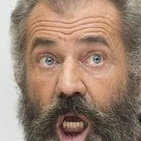

1/1 [==============================] - 0s 137ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.982624




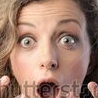

1/1 [==============================] - 0s 121ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99995816




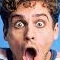

1/1 [==============================] - 0s 104ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9999713




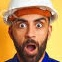

1/1 [==============================] - 0s 129ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9992853




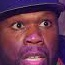

1/1 [==============================] - 0s 123ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.6050754




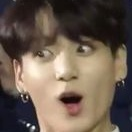

1/1 [==============================] - 0s 80ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9956204




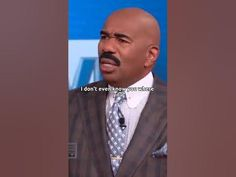

1/1 [==============================] - 0s 60ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.56327444




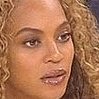

1/1 [==============================] - 0s 69ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.7040334




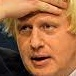

1/1 [==============================] - 0s 73ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.7250137




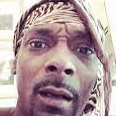

1/1 [==============================] - 0s 74ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.9517657




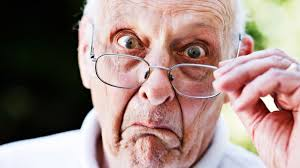

1/1 [==============================] - 0s 86ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.90781987




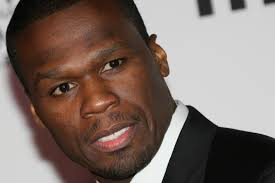

1/1 [==============================] - 0s 71ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.74325055




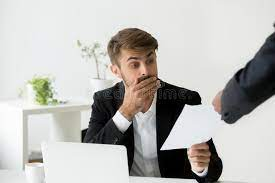

1/1 [==============================] - 0s 76ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.8261927




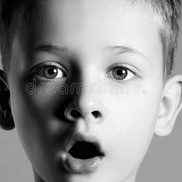

1/1 [==============================] - 0s 64ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9928462




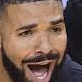

1/1 [==============================] - 0s 67ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.6593404




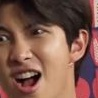

1/1 [==============================] - 0s 69ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.8890071




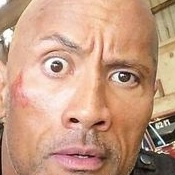

1/1 [==============================] - 0s 71ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.6596648




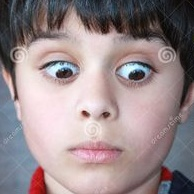

1/1 [==============================] - 0s 67ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.98562706




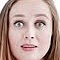

1/1 [==============================] - 0s 104ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9696592




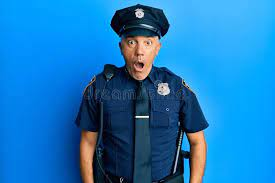

1/1 [==============================] - 0s 73ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.8329075




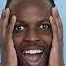

1/1 [==============================] - 0s 63ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.6139485




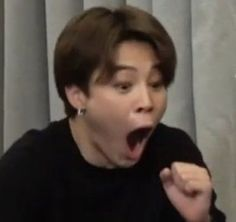

1/1 [==============================] - 0s 65ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.997029




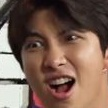

1/1 [==============================] - 0s 74ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99181366




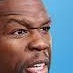

1/1 [==============================] - 0s 66ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.9226156




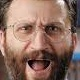

1/1 [==============================] - 0s 58ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.5239521




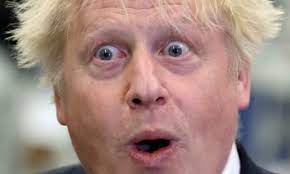

1/1 [==============================] - 0s 69ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.8633867




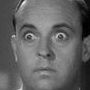

1/1 [==============================] - 0s 82ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99631727




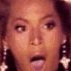

1/1 [==============================] - 0s 73ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9438602




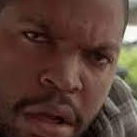

1/1 [==============================] - 0s 78ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.6588273




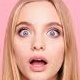

1/1 [==============================] - 0s 68ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9998135




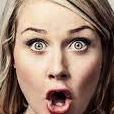

1/1 [==============================] - 0s 78ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9999883




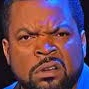

1/1 [==============================] - 0s 82ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.9016968




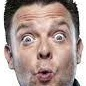

1/1 [==============================] - 0s 72ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99887747




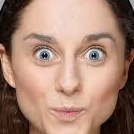

1/1 [==============================] - 0s 75ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9996705




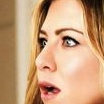

1/1 [==============================] - 0s 79ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.98496765




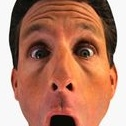

1/1 [==============================] - 0s 80ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99963975




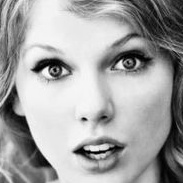

1/1 [==============================] - 0s 85ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9841918




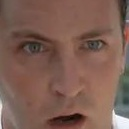

1/1 [==============================] - 0s 71ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.5555372




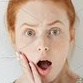

1/1 [==============================] - 0s 79ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99982375




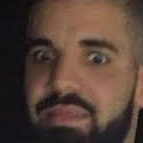

1/1 [==============================] - 0s 76ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.44617525




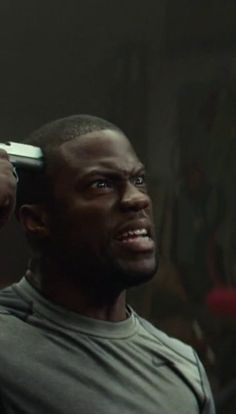

1/1 [==============================] - 0s 71ms/step
Label: surprise
Previsão: happy
Probabilidade: 0.98029476




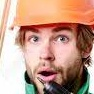

1/1 [==============================] - 0s 76ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9997887




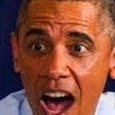

1/1 [==============================] - 0s 74ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99934906




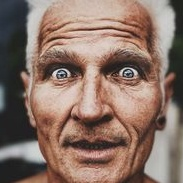

1/1 [==============================] - 0s 79ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9996655




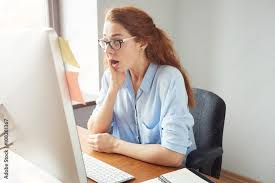

1/1 [==============================] - 0s 77ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.6927505




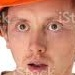

1/1 [==============================] - 0s 67ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.5110208




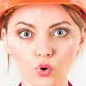

1/1 [==============================] - 0s 85ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99992824




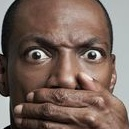

1/1 [==============================] - 0s 78ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.9395128




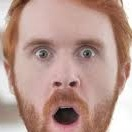

1/1 [==============================] - 0s 79ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.99985754




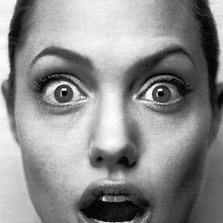

1/1 [==============================] - 0s 83ms/step
Label: surprise
Previsão: surprise
Probabilidade: 0.999984




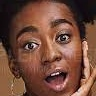

1/1 [==============================] - 0s 82ms/step
Label: surprise
Previsão: sad
Probabilidade: 0.7313697




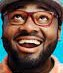

1/1 [==============================] - 0s 76ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99996376




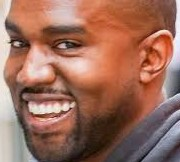

1/1 [==============================] - 0s 74ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9241021




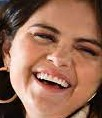

1/1 [==============================] - 0s 75ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9996055




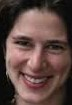

1/1 [==============================] - 0s 76ms/step
Label: happy
Previsão: happy
Probabilidade: 0.84282374




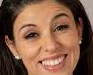

1/1 [==============================] - 0s 84ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9982748




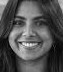

1/1 [==============================] - 0s 80ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9023414




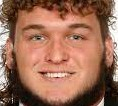

1/1 [==============================] - 0s 76ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9830513




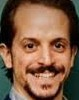

1/1 [==============================] - 0s 79ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99998903




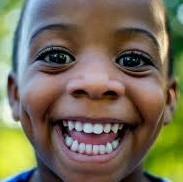

1/1 [==============================] - 0s 82ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99999666




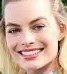

1/1 [==============================] - 0s 99ms/step
Label: happy
Previsão: happy
Probabilidade: 0.997306




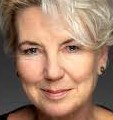

1/1 [==============================] - 0s 97ms/step
Label: happy
Previsão: happy
Probabilidade: 0.5224932




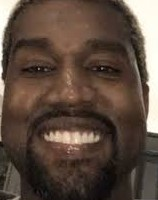

1/1 [==============================] - 0s 112ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9980591




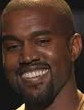

1/1 [==============================] - 0s 96ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9970277




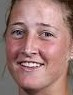

1/1 [==============================] - 0s 84ms/step
Label: happy
Previsão: happy
Probabilidade: 0.97659886




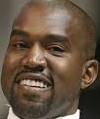

1/1 [==============================] - 0s 85ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9986413




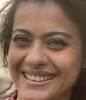

1/1 [==============================] - 0s 90ms/step
Label: happy
Previsão: happy
Probabilidade: 0.95773846




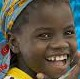

1/1 [==============================] - 0s 131ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99956304




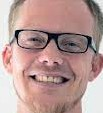

1/1 [==============================] - 0s 127ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99780566




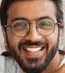

1/1 [==============================] - 0s 142ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99718577




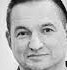

1/1 [==============================] - 0s 151ms/step
Label: happy
Previsão: sad
Probabilidade: 0.67291343




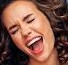

1/1 [==============================] - 0s 105ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9117754




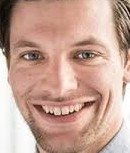

1/1 [==============================] - 0s 151ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9962366




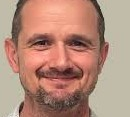

1/1 [==============================] - 0s 151ms/step
Label: happy
Previsão: happy
Probabilidade: 0.8261345




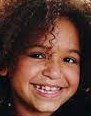

1/1 [==============================] - 0s 106ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99989307




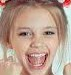

1/1 [==============================] - 0s 100ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9865774




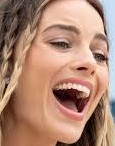

1/1 [==============================] - 0s 106ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999267




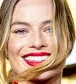

1/1 [==============================] - 0s 99ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99009514




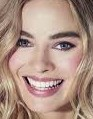

1/1 [==============================] - 0s 127ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99188954




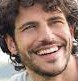

1/1 [==============================] - 0s 88ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9983911




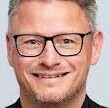

1/1 [==============================] - 0s 134ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999391




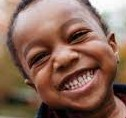

1/1 [==============================] - 0s 109ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9993099




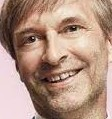

1/1 [==============================] - 0s 143ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9989466




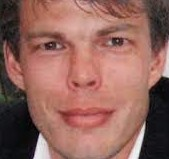

1/1 [==============================] - 0s 98ms/step
Label: happy
Previsão: happy
Probabilidade: 0.95280176




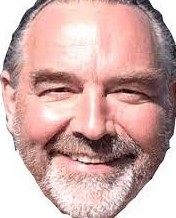

1/1 [==============================] - 0s 81ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9997658




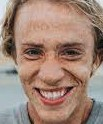

1/1 [==============================] - 0s 96ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9995364




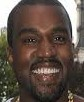

1/1 [==============================] - 0s 140ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9985929




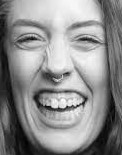

1/1 [==============================] - 0s 115ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999751




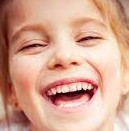

1/1 [==============================] - 0s 135ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9995147




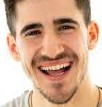

1/1 [==============================] - 0s 153ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9970962




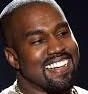

1/1 [==============================] - 0s 119ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999988




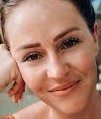

1/1 [==============================] - 0s 112ms/step
Label: happy
Previsão: happy
Probabilidade: 0.82964253




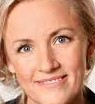

1/1 [==============================] - 0s 147ms/step
Label: happy
Previsão: happy
Probabilidade: 0.97501606




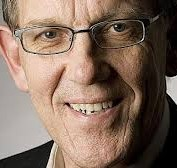

1/1 [==============================] - 0s 146ms/step
Label: happy
Previsão: sad
Probabilidade: 0.86239636




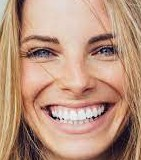

1/1 [==============================] - 0s 147ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999933




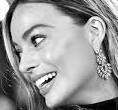

1/1 [==============================] - 0s 93ms/step
Label: happy
Previsão: happy
Probabilidade: 0.98800474




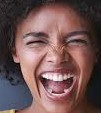

1/1 [==============================] - 0s 98ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99069244




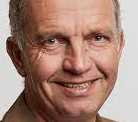

1/1 [==============================] - 0s 89ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99790096




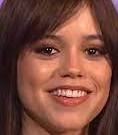

1/1 [==============================] - 0s 114ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9964489




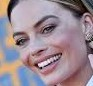

1/1 [==============================] - 0s 89ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9586356




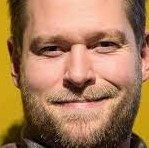

1/1 [==============================] - 0s 94ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9742386




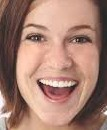

1/1 [==============================] - 0s 85ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9893472




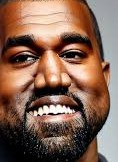

1/1 [==============================] - 0s 89ms/step
Label: happy
Previsão: happy
Probabilidade: 1.0




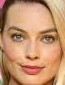

1/1 [==============================] - 0s 102ms/step
Label: happy
Previsão: happy
Probabilidade: 0.6514463




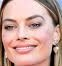

1/1 [==============================] - 0s 91ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9876582




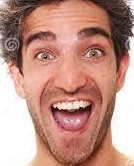

1/1 [==============================] - 0s 139ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99982625




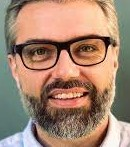

1/1 [==============================] - 0s 98ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999932




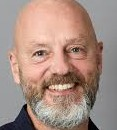

1/1 [==============================] - 0s 80ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9997749




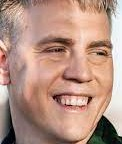

1/1 [==============================] - 0s 100ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999764




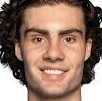

1/1 [==============================] - 0s 83ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999455




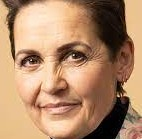

1/1 [==============================] - 0s 86ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9249575




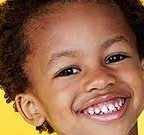

1/1 [==============================] - 0s 84ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999598




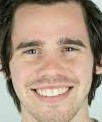

1/1 [==============================] - 0s 80ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9996376




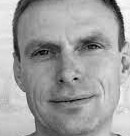

1/1 [==============================] - 0s 89ms/step
Label: happy
Previsão: sad
Probabilidade: 0.867476




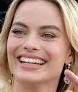

1/1 [==============================] - 0s 93ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999269




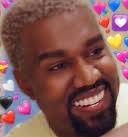

1/1 [==============================] - 0s 78ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9494804




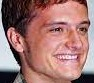

1/1 [==============================] - 0s 84ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99413294




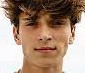

1/1 [==============================] - 0s 82ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9953816




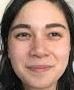

1/1 [==============================] - 0s 82ms/step
Label: happy
Previsão: happy
Probabilidade: 0.8069362




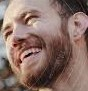

1/1 [==============================] - 0s 96ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9086594




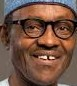

1/1 [==============================] - 0s 82ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9999999




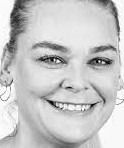

1/1 [==============================] - 0s 93ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9962999




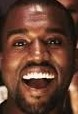

1/1 [==============================] - 0s 85ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9964238




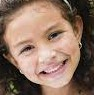

1/1 [==============================] - 0s 109ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99656713




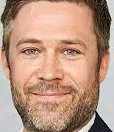

1/1 [==============================] - 0s 160ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9993542




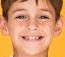

1/1 [==============================] - 0s 190ms/step
Label: happy
Previsão: happy
Probabilidade: 0.97922635




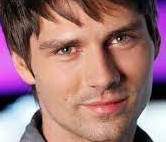

1/1 [==============================] - 0s 190ms/step
Label: happy
Previsão: happy
Probabilidade: 0.968256




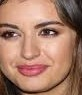

1/1 [==============================] - 0s 125ms/step
Label: happy
Previsão: happy
Probabilidade: 0.95239216




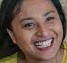

1/1 [==============================] - 0s 194ms/step
Label: happy
Previsão: happy
Probabilidade: 0.8108377




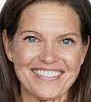

1/1 [==============================] - 0s 85ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9995839




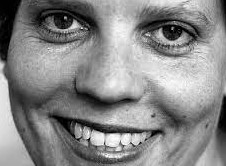

1/1 [==============================] - 0s 119ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99965644




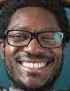

1/1 [==============================] - 0s 160ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9989341




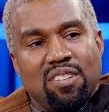

1/1 [==============================] - 0s 197ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9849029




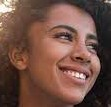

1/1 [==============================] - 0s 167ms/step
Label: happy
Previsão: happy
Probabilidade: 0.986187




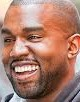

1/1 [==============================] - 0s 111ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99980086




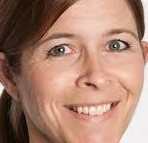

1/1 [==============================] - 0s 119ms/step
Label: happy
Previsão: happy
Probabilidade: 0.65847605




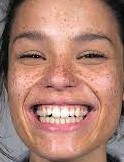

1/1 [==============================] - 0s 293ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9998934




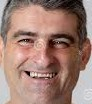

1/1 [==============================] - 0s 241ms/step
Label: happy
Previsão: happy
Probabilidade: 0.97875845




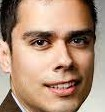

1/1 [==============================] - 0s 272ms/step
Label: happy
Previsão: happy
Probabilidade: 0.8750761




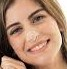

1/1 [==============================] - 0s 175ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9053484




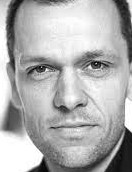

1/1 [==============================] - 0s 196ms/step
Label: happy
Previsão: sad
Probabilidade: 0.77004015




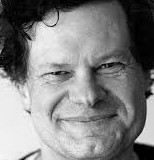

1/1 [==============================] - 0s 321ms/step
Label: happy
Previsão: happy
Probabilidade: 0.9685583




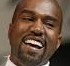

1/1 [==============================] - 0s 193ms/step
Label: happy
Previsão: happy
Probabilidade: 0.998976




In [42]:
parent_dir = 'Face Expressions (Happy, Sad, Surprise)/test'
count_images = 0
class_names = ['happy',
               'sad',
               'surprise']
y_pred = list()
y_true = list()

# Percorrendo a pasta onde estão salvas as imagens de teste
for subdir, dirs, files in os.walk(parent_dir):

    for file in files:

        if file.endswith('.png') or file.endswith('.jpg'):

            count_images+=1
            split_path = os.path.join(subdir, file).split('/')
            label = split_path[2]
            y_true.append(label)

            img_path = os.path.join(subdir, file)
            display(Image(filename=img_path, width=300))

            img = image.load_img(img_path, target_size=(img_height, img_width))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x.astype('float32') / 255.0

            # Previsão
            prediction = model.predict(x)

            # Printando as saídas do modelo
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]
            y_pred.append(class_names[predicted_class])
            print("Label:", label)
            print("Previsão:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")

### Visualização de métricas da avaliação do modelo

In [43]:
# Calculando as métricas
accuracy = skm.accuracy_score(y_true, y_pred)
precision = skm.precision_score(y_true, y_pred, average='weighted')
recall = skm.recall_score(y_true, y_pred, average='weighted')
f1score = skm.f1_score(y_true, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Accuracy:  0.6879699248120301
Precision:  0.741858558044917
Recall:  0.6879699248120301
F1 Score:  0.6811391000663739


In [77]:
# definindo a função para criação da matriz de confusão (avaliação do modelo)  matplotlib + sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

Matriz de confusão sem normalização


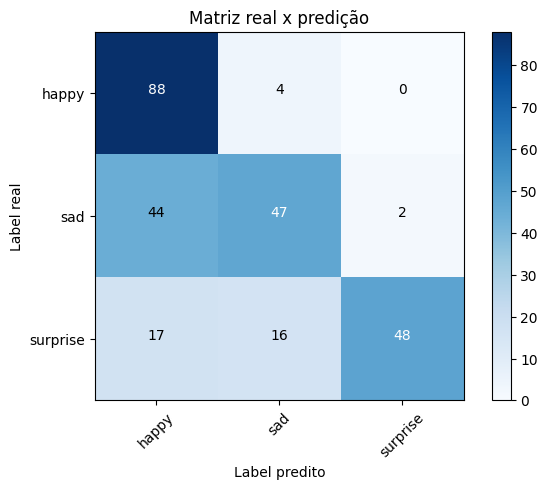

In [80]:
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['happy', 'sad', 'surprise'],
                      normalize=False,
                      title='Matriz real x predição')
plt.show()


## 6. Salvando o Modelo para Uso Posterior

In [88]:
from google.colab import drive

# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
formato_hora = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(formato_hora)

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the path to the directory where you want to save the model
save_path = '/content/drive/MyDrive/Pos Ciencia de Dados/Models/'

name_model = 'trained_model_' + formatted_datetime + '.h5'

# Save the trained model to Google Drive
model.save(save_path + name_model)

print("Modelo salvo com o nome: ", name_model)

Mounted at /content/drive
Modelo salvo com o nome:  trained_model_2023-07-05T1904.h5


## 7. Recuperando o Modelo para Uso

In [100]:
# importando as bibliotecas necessárias para usar no notebook

# para usar o Google Drive

!pip install gdown
import gdown
from google.colab import drive

# para poder acessar e manipular arquivos e diretórios / sistema operacional
import os
import shutil
import zipfile

# para mostrar as imagens
from IPython.display import Image

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the path to the saved model

name_saved_model = 'trained_model_2023-07-05T1904.h5'

# Load the model
loaded_model = keras.models.load_model(f'{save_path}/{name_model}')

print(f"Model {name_model} loaded successfully.")

Model trained_model_2023-07-05T1904.h5 loaded successfully.


## 8. Inserindo uma nova pasta para testes (fora do dataset original)

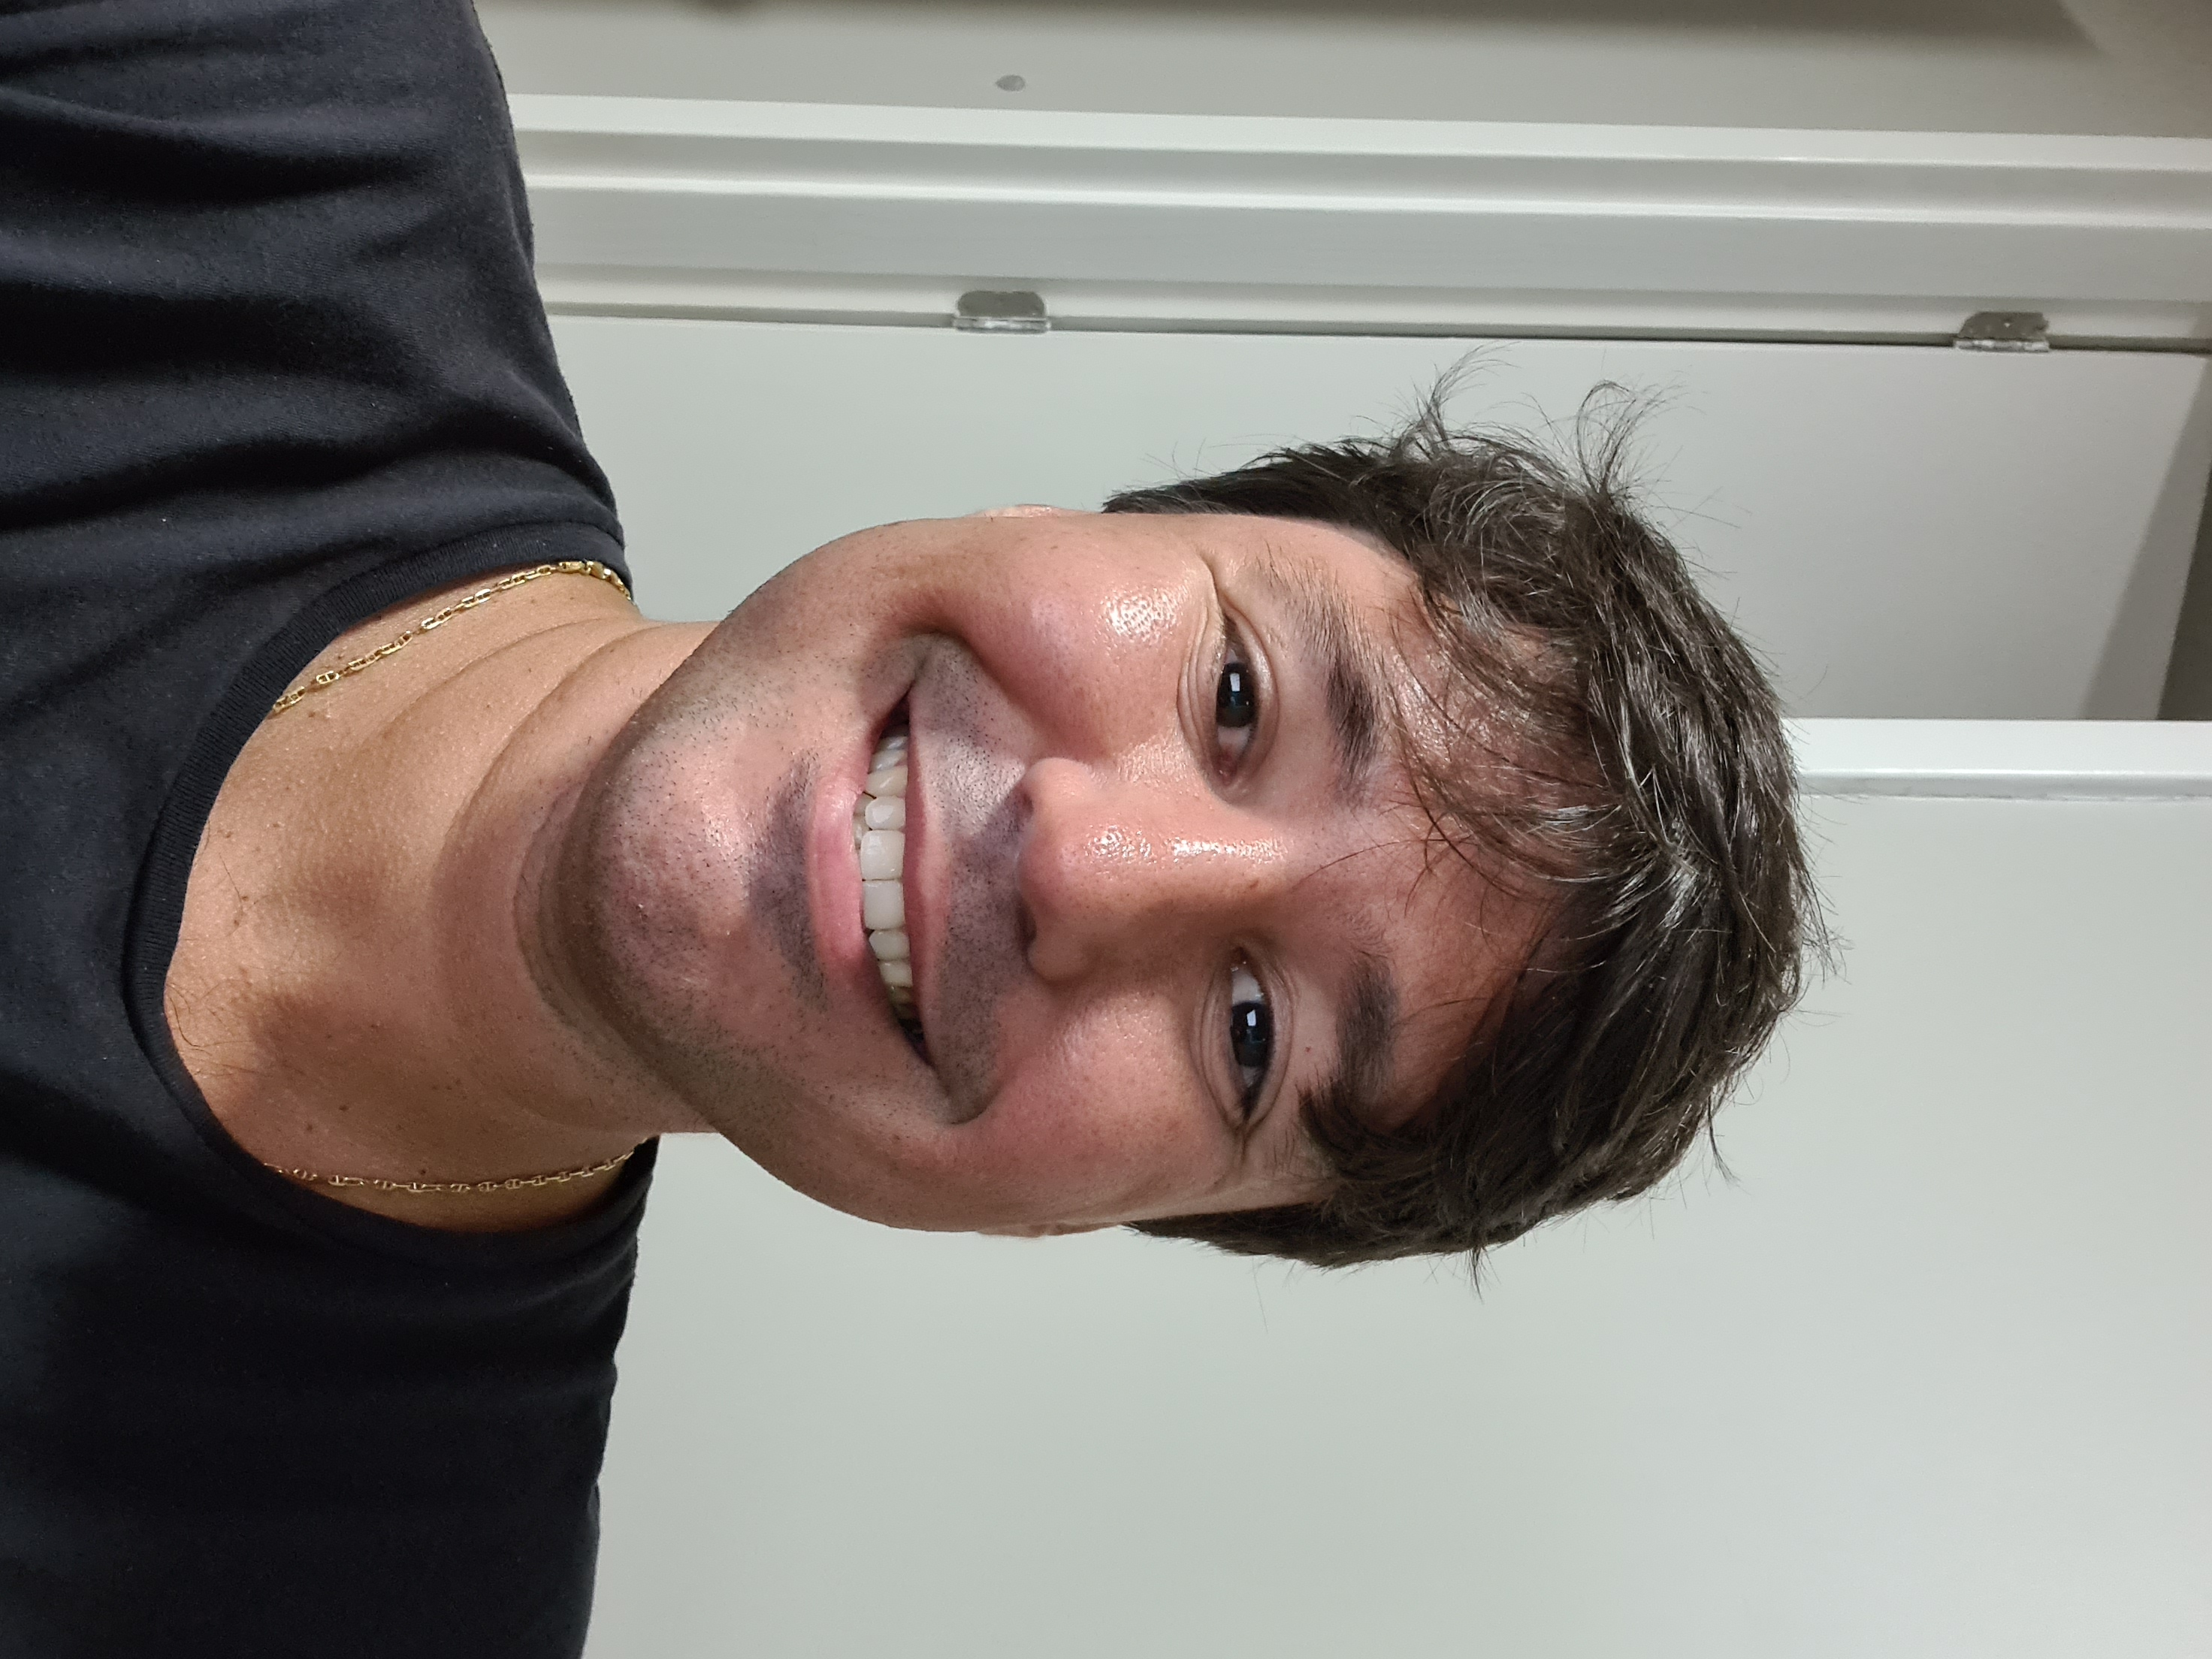

1/1 [==============================] - 0s 97ms/step
Label: happy
Previsão: happy
Probabilidade: 0.58505726




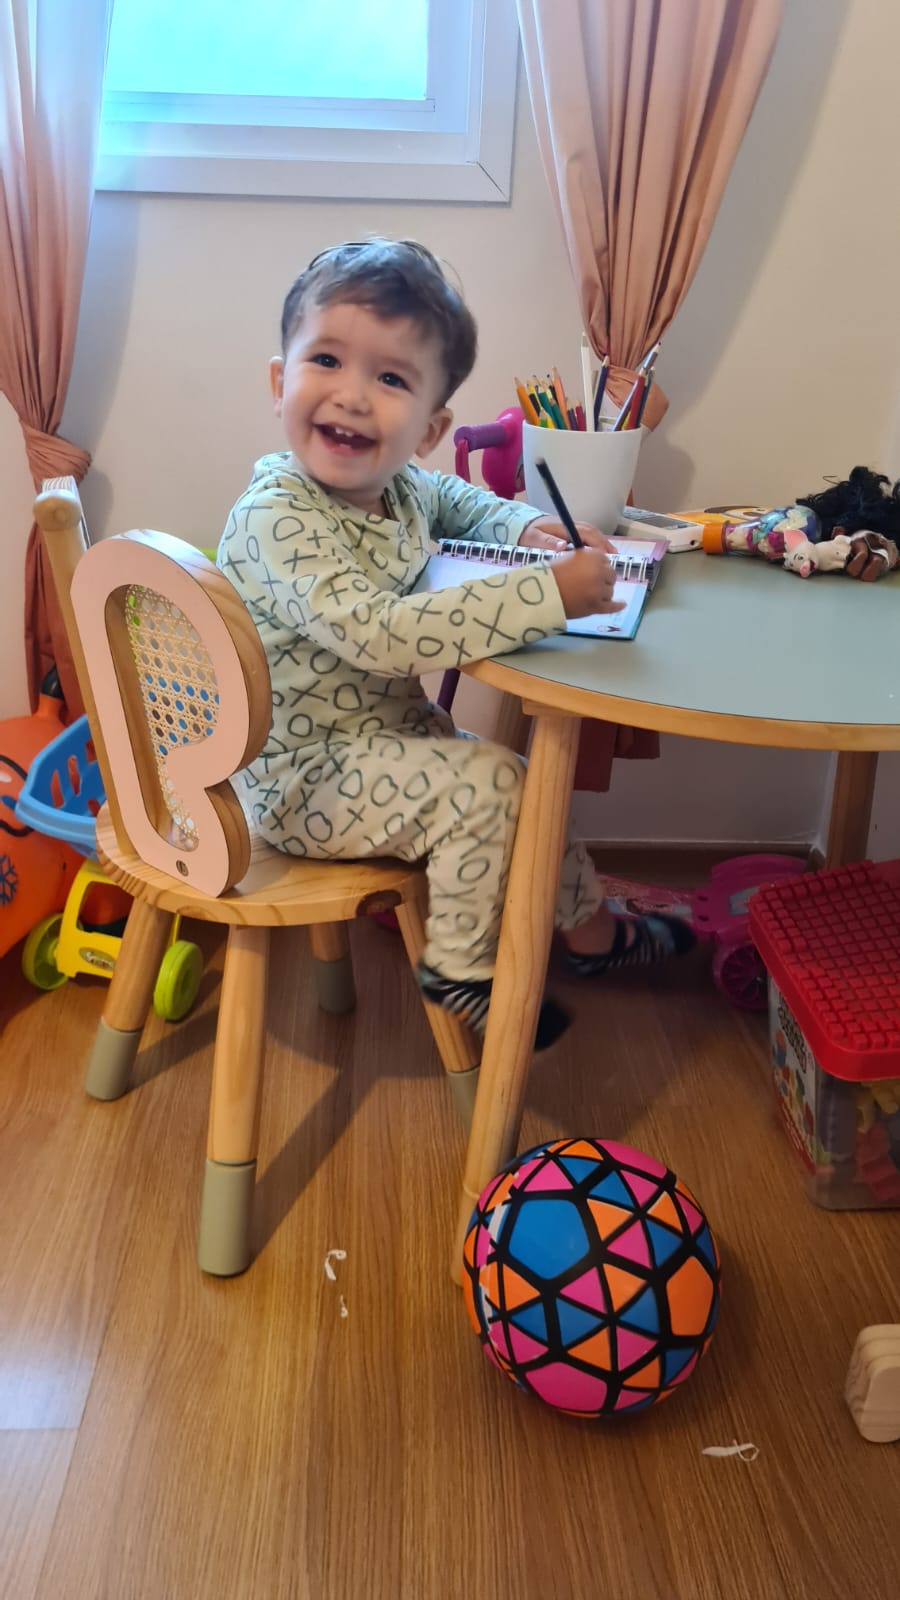

1/1 [==============================] - 0s 155ms/step
Label: happy
Previsão: happy
Probabilidade: 0.99966335




In [103]:
parent_dir = '/content/drive/MyDrive/Pos Ciencia de Dados/Teste_Foto/'
count_images = 0
class_names = ['happy',
               'sad',
               'surprise']
y_pred = list()
y_true = list()

# Percorrendo a pasta onde estão salvas as imagens de teste
for subdir, dirs, files in os.walk(parent_dir):

    for file in files:

        if file.endswith('.png') or file.endswith('.jpg'):

            count_images+=1
            split_path = os.path.join(subdir, file).split('/')
            label = split_path[-2]
            y_true.append(label)

            img_path = os.path.join(subdir, file)
            display(Image(filename=img_path, width=300))

            img = image.load_img(img_path, target_size=(img_height, img_width))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x.astype('float32') / 255.0

            # Previsão
            prediction = model.predict(x)

            # Printando as saídas do modelo
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]
            y_pred.append(class_names[predicted_class])
            print("Label:", label)
            print("Previsão:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")